# Introduction

A <b>Neutron Star</b> is a star that forms when a giant star burns all of its Hydrogen into heavier elements, thus no longer emitting enough energy to maintain its structure, so it collapses under its own weight: All of its electrons collapse into the nucleus. A <b>Pulsar</b> is a neutron Star that spins rapidly, containing a beam of electromagnetic radiation along its magnetic poles, which when swept across Earth is detectable. Pulsars are important for many reasons, a few of them being:
<ul>
    <li>Confirming The General Theory of Relativety</li>
    <li>Allowing for new insights in Nuclear Physics</li>
    <li>Confirming of Gravitaty Waves(2017)</li>
    <li>Providing evidence on the origin of heavy metals</li>
</ul>

## Import Statements

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 

conn = sqlite3.connect('pulsar_data.db')    #Create SQL Database named 'pulsar_data'
pulsar_data = pd.read_csv('pulsar_stars.csv')    #Read the CSV file
pulsar_data.to_sql('pulsar_data', conn, if_exists = 'replace')    #Populate the database with the CSV entries

## Psuedo-Header

In [2]:
top_of = list(pulsar_data)
print('The names of the columns are: \t')
count = 1
for top in top_of:
    print('\n {}. {}'.format(count, top))
    count += 1

The names of the columns are: 	

 1. mean_of_the_integrated_profile

 2. standard_deviation_of_the_integrated_profile

 3. excess_kurtosis_of_the_integrated_profile

 4. skewness_of_the_integrated_profile

 5. mean_of_the_dm-snr_curve

 6. standard_deviation_of_the_dm-snr_curve

 7. excess_kurtosis_of_the_dm-snr_curve

 8. skewness_of_the_dm-snr_curve

 9. target_class


<i>The dataset has 9 columns, with the above names for each column. The number of rows corresponds to how many potential Pulsars are in this study, and to see how many potential Pulsars there may be, the following statement is executed:</i>



In [3]:
rows = len(pulsar_data)
print("There are {} rows, and therefore there are that many potential Pulsars".format(rows))

There are 17898 rows, and therefore there are that many potential Pulsars


Out of the thousands of rows, how does one know which of these entries are Pulsars and which ones are radio interference and noise? This is found in the <b>target_class</b> column. The identifiers are 1 & 0; 1 is a Pulsar and 0 is something else. To see all the rows with a 1, run the code:

In [30]:
not_interference = pulsar_data[pulsar_data['target_class'] > 0]
not_interference.head()    #Display just the first five entries

,mean_of_the_integrated_profile,standard_deviation_of_the_integrated_profile,excess_kurtosis_of_the_integrated_profile,skewness_of_the_integrated_profile,mean_of_the_dm-snr_curve,standard_deviation_of_the_dm-snr_curve,excess_kurtosis_of_the_dm-snr_curve,skewness_of_the_dm-snr_curve,target_class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1


## Mean of the Integrated Profile

The <b>Integrated Profile</b> of a Pulsar is akin to the Pulsar's fingerprint. This is the frequency at which the Pulsar 'pulses' EM waves; the frequencies may vary considerably from one event to the next, but on average the integrated profile is quite stable.

([<matplotlib.axis.XTick at 0x15f54a7d7f0>],
 <a list of 1 Text xticklabel objects>)

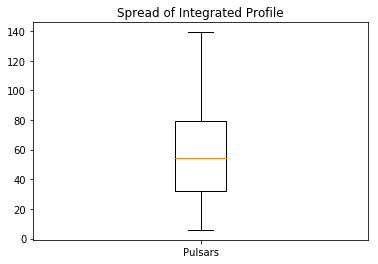

In [32]:
spread = []
i = 0
for star in range(0, len(not_interference)-1):
    spread.append(not_interference.iloc[i][0])
    i += 1
plt.boxplot(spread)
plt.title('Spread of Integrated Profile')
plt.xticks([1], ['Pulsars'])